In [27]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("futuristic_city_traffic.csv")

# number of rows
total_rows = df.shape[0]

# calculate size to sample 1% of the total dataset
sample_size = int(0.01 * total_rows)

# sample 1% of your dataset
sampled_data = df.sample(n=sample_size, random_state=42)  # 42 is random number for reproducibility

print('Top rows of the dataset: \n', sampled_data.head())

Top rows of the dataset: 
                City        Vehicle Type      Weather Economic Condition  \
847212    Ecoopolis               Drone        Clear            Booming   
760122    TechHaven  Autonomous Vehicle  Solar Flare             Stable   
678988  MetropolisX  Autonomous Vehicle        Clear             Stable   
544510  MetropolisX  Autonomous Vehicle        Rainy             Stable   
203363  MetropolisX  Autonomous Vehicle        Snowy          Recession   

       Day Of Week  Hour Of Day    Speed  Is Peak Hour  Random Event Occurred  \
847212    Thursday           23  45.8742             0                      0   
760122      Monday            8  43.4756             1                      0   
678988      Monday           14  66.3621             0                      0   
544510    Thursday           15  46.4420             0                      0   
203363    Thursday            5  42.2895             0                      0   

        Energy Consumption  Traffic

In [28]:
print('Data types: \n', sampled_data.info())

print(sampled_data.dtypes)
print(sampled_data.describe())

# missing values(fill with mean)
sampled_data.fillna(sampled_data.mean(numeric_only=True), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12195 entries, 847212 to 157701
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   12195 non-null  object 
 1   Vehicle Type           12195 non-null  object 
 2   Weather                12195 non-null  object 
 3   Economic Condition     12195 non-null  object 
 4   Day Of Week            12195 non-null  object 
 5   Hour Of Day            12195 non-null  int64  
 6   Speed                  12195 non-null  float64
 7   Is Peak Hour           12195 non-null  int64  
 8   Random Event Occurred  12195 non-null  int64  
 9   Energy Consumption     12195 non-null  float64
 10  Traffic Density        12195 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ MB
Data types: 
 None
City                      object
Vehicle Type              object
Weather                   object
Economic Condition        obj

In [29]:
print('Check number of null values: \n', sampled_data.isnull().sum())

Check number of null values: 
 City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64


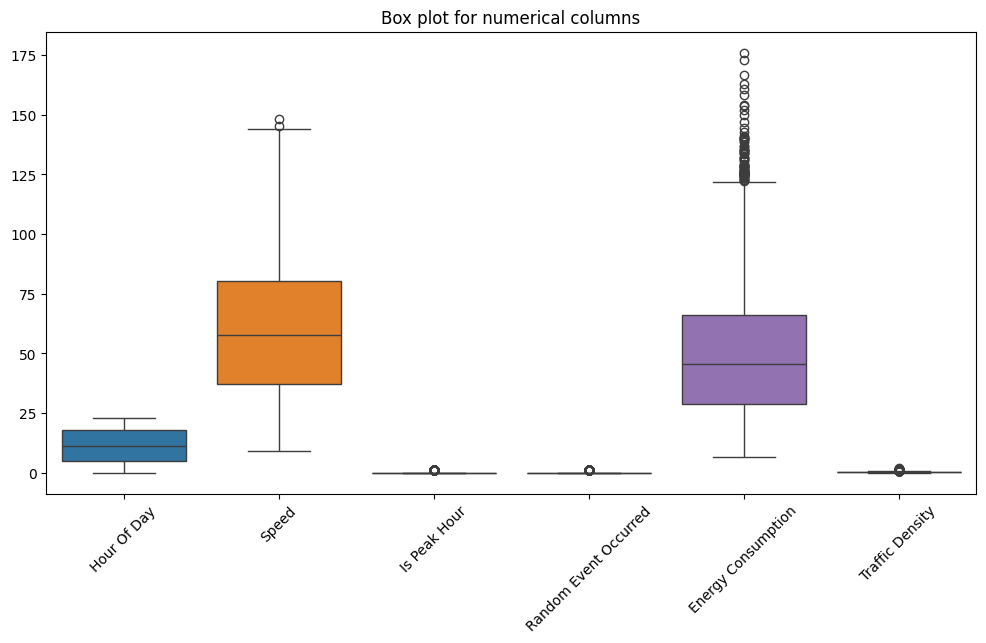

In [30]:
# begin with numerical columns
numerical_cols = ['Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Energy Consumption', 'Traffic Density']
numerical_data = sampled_data[numerical_cols]

# visual inspection
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_data)
plt.title('Box plot for numerical columns')
plt.xticks(rotation=45)
plt.show()

In [31]:
summary_stats = numerical_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
        Hour Of Day         Speed  Is Peak Hour  Random Event Occurred  \
count  12195.000000  12195.000000  12195.000000           12195.000000   
mean      11.540139     59.514110      0.147765               0.051087   
std        6.970598     26.848123      0.354882               0.220183   
min        0.000000      9.131400      0.000000               0.000000   
25%        5.000000     36.923950      0.000000               0.000000   
50%       11.000000     57.592100      0.000000               0.000000   
75%       18.000000     80.093700      0.000000               0.000000   
max       23.000000    148.262400      1.000000               1.000000   

       Energy Consumption  Traffic Density  
count        12195.000000     12195.000000  
mean            49.129219         0.279883  
std             25.376515         0.221251  
min              6.702600         0.006700  
25%             28.666100         0.105000  
50%             45.326400         0.219700 

In [32]:
# IQR Method
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR):")
print(IQR)


Interquartile Range (IQR):
Hour Of Day              13.00000
Speed                    43.16975
Is Peak Hour              0.00000
Random Event Occurred     0.00000
Energy Consumption       37.34440
Traffic Density           0.29410
dtype: float64


In [33]:
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers detected using IQR method:")
print(numerical_data[outliers])


Outliers detected using IQR method:
         Hour Of Day     Speed  Is Peak Hour  Random Event Occurred  \
760122             8   43.4756             1                      0   
966542             7   83.3173             1                      0   
120742            22  101.1375             0                      1   
426741            19   47.0017             0                      0   
94548              7   65.4077             1                      0   
...              ...       ...           ...                    ...   
444757             7   58.2412             1                      0   
790420             8   43.2166             1                      0   
186754            18  138.5881             1                      0   
1131139           16  107.3229             0                      0   
1036607           12   52.5482             1                      0   

         Energy Consumption  Traffic Density  
760122              43.9147           0.2234  
966542          

In [34]:
# Z-score method
z_scores = stats.zscore(numerical_data)
threshold = 3
outliers_zscore = (abs(z_scores) > threshold).any(axis=1)
print("\nOutliers detected using Z-score method:")
print(numerical_data[outliers_zscore])


Outliers detected using Z-score method:
         Hour Of Day     Speed  Is Peak Hour  Random Event Occurred  \
120742            22  101.1375             0                      1   
426741            19   47.0017             0                      0   
969316             1   63.3718             0                      1   
965351            20   35.7133             0                      1   
765607             4   81.3977             0                      1   
...              ...       ...           ...                    ...   
714356            18   72.4171             1                      1   
1130586           17   53.4068             1                      1   
400682             3   52.0257             0                      1   
204886             4   76.3448             0                      1   
1131139           16  107.3229             0                      0   

         Energy Consumption  Traffic Density  
120742              80.9100           0.1385  
426741      

In [35]:
# take traffic density as main column
traffic_density = sampled_data['Traffic Density'].values.reshape(-1, 1)

# threshold for contamination
contamination_threshold = sampled_data['Traffic Density'].quantile(0.75) + 0.05

# Isolation Forest Model
clf = IsolationForest(contamination=contamination_threshold, random_state=42)

# Fit the model and predict outliers
outliers = clf.fit_predict(traffic_density)

sampled_data.reset_index(drop=True, inplace=True)

# '1' indicates inliers, '-1' indicates outliers
outliers_indices = sampled_data.index[outliers == -1]

print("Outliers detected using Isolation Forest:")
print(sampled_data.iloc[outliers_indices])

Outliers detected using Isolation Forest:
               City        Vehicle Type                Weather  \
2       MetropolisX  Autonomous Vehicle                  Clear   
3       MetropolisX  Autonomous Vehicle                  Rainy   
5          AquaCity          Flying Car                  Snowy   
8      SolarisVille  Autonomous Vehicle                  Snowy   
12         AquaCity               Drone                  Snowy   
...             ...                 ...                    ...   
12186     TechHaven               Drone                  Snowy   
12189   MetropolisX               Drone  Electromagnetic Storm   
12190   MetropolisX  Autonomous Vehicle            Solar Flare   
12191     TechHaven               Drone                  Snowy   
12194   MetropolisX               Drone            Solar Flare   

      Economic Condition Day Of Week  Hour Of Day    Speed  Is Peak Hour  \
2                 Stable      Monday           14  66.3621             0   
3            

In [36]:
# remove outliers
cleaned_df = sampled_data.drop(outliers_indices)

print("Cleaned DataFrame without outliers:")
print(cleaned_df)

Cleaned DataFrame without outliers:
               City        Vehicle Type                Weather  \
0         Ecoopolis               Drone                  Clear   
1         TechHaven  Autonomous Vehicle            Solar Flare   
4       MetropolisX  Autonomous Vehicle                  Snowy   
6          AquaCity               Drone            Solar Flare   
7         Ecoopolis               Drone                  Clear   
...             ...                 ...                    ...   
12184  SolarisVille  Autonomous Vehicle                  Snowy   
12187     Ecoopolis  Autonomous Vehicle  Electromagnetic Storm   
12188     TechHaven  Autonomous Vehicle            Solar Flare   
12192      AquaCity  Autonomous Vehicle                  Snowy   
12193     Ecoopolis               Drone            Solar Flare   

      Economic Condition Day Of Week  Hour Of Day    Speed  Is Peak Hour  \
0                Booming    Thursday           23  45.8742             0   
1                 S

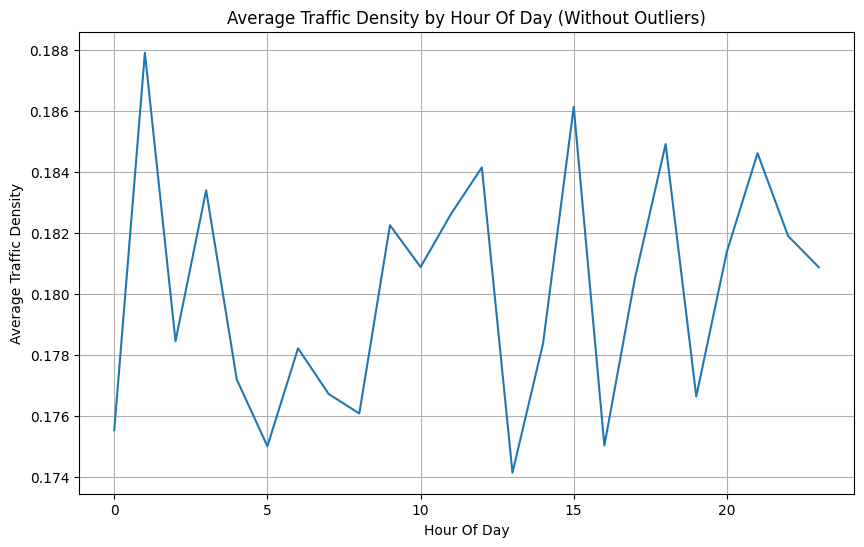

In [37]:
# Calculate average traffic density for each hour of the day
hourly_avg_density = cleaned_df.groupby('Hour Of Day')['Traffic Density'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg_density, x='Hour Of Day', y='Traffic Density')
plt.title('Average Traffic Density by Hour Of Day (Without Outliers)')
plt.xlabel('Hour Of Day')
plt.ylabel('Average Traffic Density')
plt.grid(True)
plt.show()